# Exercise 2

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

## Exercise 2.1

Here we want to calculate the value of a 1 dimensional integral using first random number sampled from a uniform distribution, then from a distribution which is closer to the function we are integrating

First we load the data from the evaluation using uniform distribution sampling

In [2]:
x, I_est_uniform, I_err_uniform = np.loadtxt("I_mc_uniform.dat", unpack = True) 

then from a non uniform distribution

In [23]:
x, I_est_nonuniform, I_err_nonuniform = np.loadtxt("I_mc_nonuniform.dat", unpack = True) 

Text(0, 0.5, '$I_{MC}$')

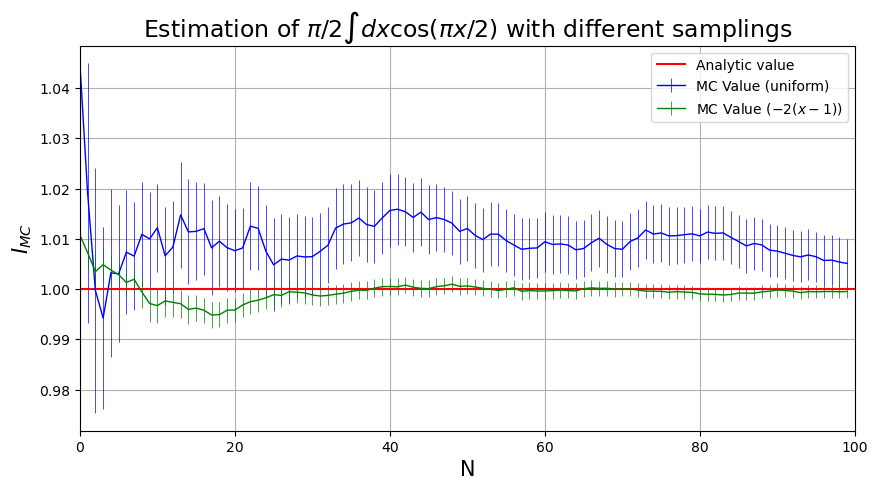

In [45]:
plt.figure(figsize = (10,5))
plt.errorbar(x, I_est_uniform, I_err_uniform, label = "MC Value (uniform)", color = "blue", linewidth = 1, elinewidth = 0.5)
plt.errorbar(x, I_est_nonuniform, I_err_nonuniform, label = r"MC Value ($-2(x - 1)$)", color = "green", linewidth = 1, elinewidth = 0.5)
plt.axhline(1., color = "red", label = "Analytic value", linewidth = 1.5)
plt.legend()
plt.xlim((0, 100))
plt.grid()
plt.title(r"Estimation of $\pi / 2 \int dx \cos(\pi x / 2)$ with different samplings", fontsize = 17)
plt.xlabel("N", fontsize = 15)
plt.ylabel(r"$I_{MC}$", fontsize = 15)

It can immediatly be seen that the evaluation of the integral using a non uniform distribution (even as simple as $-2(x - 1)$) converges more quickly and gives smaller uncertainties

## Exercise 2.2

In [50]:
sqrt_dist, err = np.loadtxt("output_rw_disc.dat", unpack = True)
x = np.arange(0, 100)

In [56]:
def diffusion(x, k):
    return k * np.sqrt(x)

In [78]:
k = curve_fit(diffusion, x, sqrt_dist)[0][0]

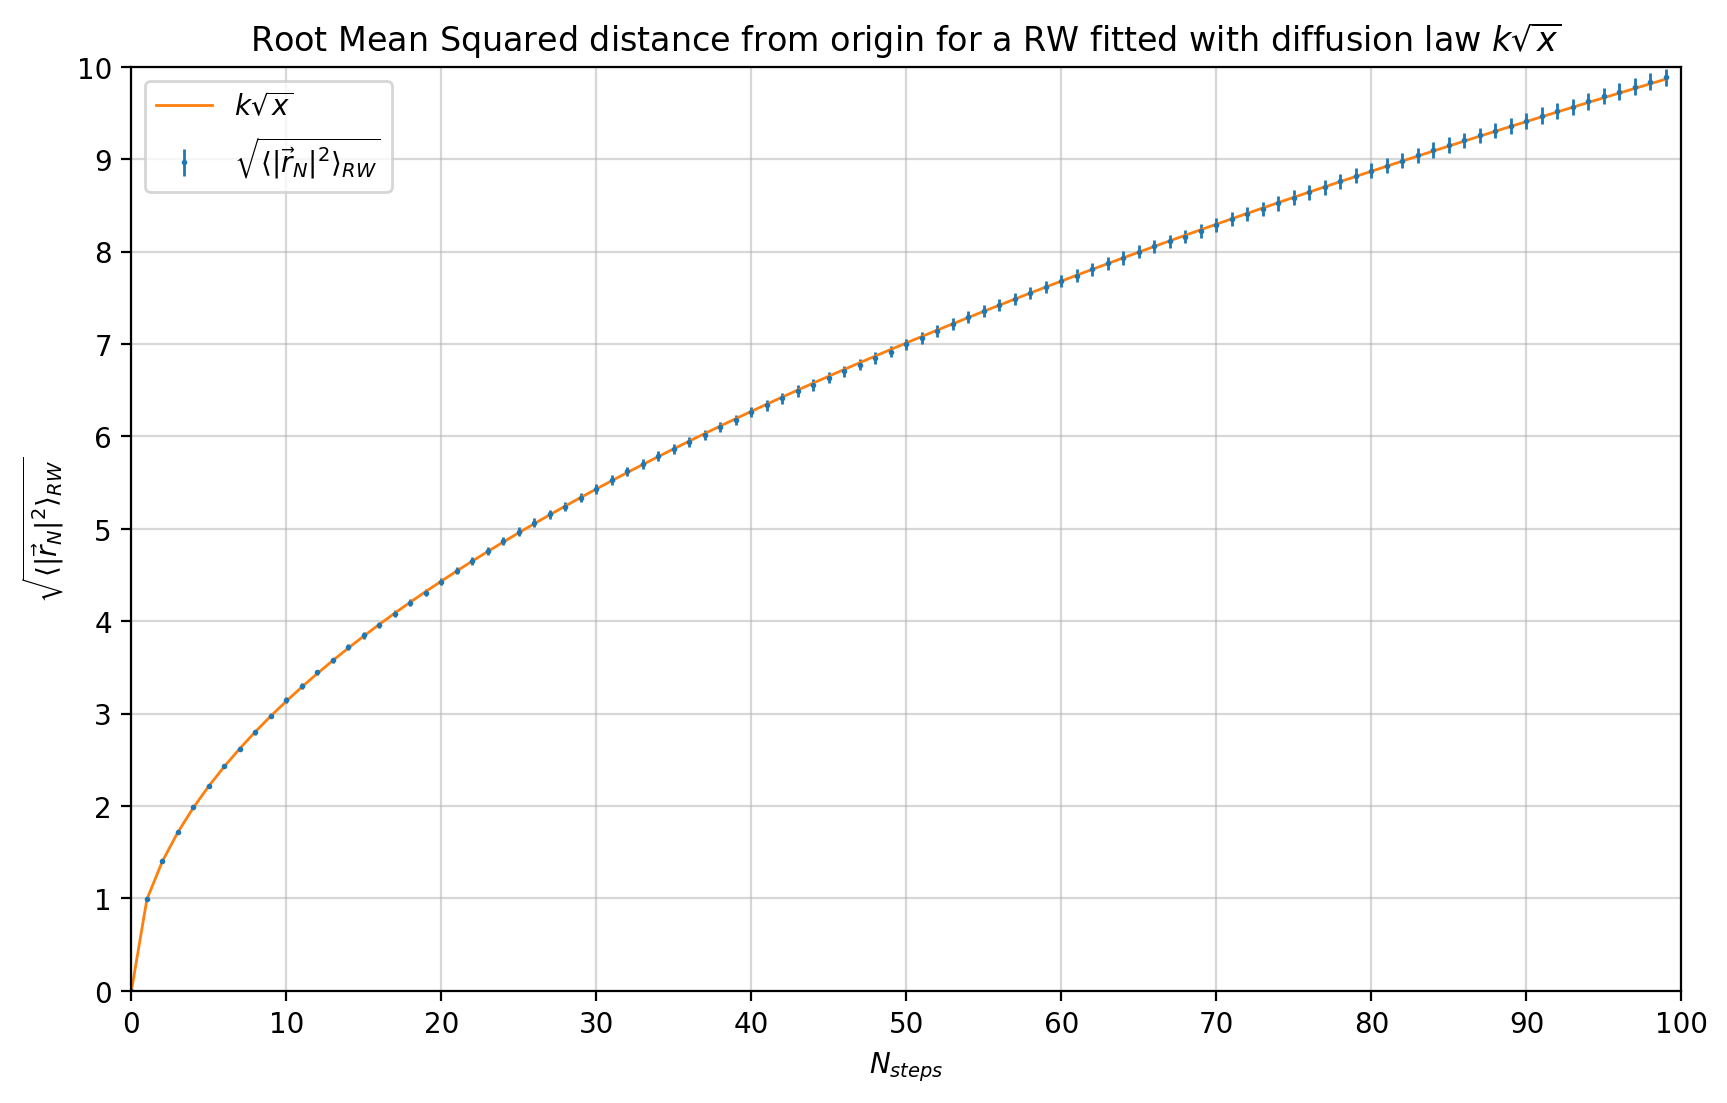

In [95]:
plt.figure(figsize = (10, 6), dpi = 200)
plt.errorbar(x, sqrt_dist, err, linewidth = 0, elinewidth = 1, marker = "o", markersize = 1, label = r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
plt.plot(x, diffusion(x, k), linewidth = 1, label = r"$k\sqrt{ x }$")
plt.grid(alpha = .5)
plt.xlim((0,100))
plt.ylim((0, 10))
plt.xlabel(r"$N_{steps}$")
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
plt.title("Root Mean Squared distance from origin for a RW fitted with diffusion law $k\sqrt{x}$")
plt.xticks(np.arange(0,110, 10))
plt.yticks(np.arange(0,11))
plt.legend()
plt.savefig("susrw.png")